In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
np.random.seed(42)  
n_samples = 1000
data = {
    'CustomerID': np.arange(1001, 1001 + n_samples),
    'Gender': np.random.choice(['Male', 'Female'], size=n_samples),
    'Age': np.random.randint(18, 80, size=n_samples),
    'ServiceLength': np.random.randint(1, 60, size=n_samples),
    'ContractType': np.random.choice(['Two-Year', 'One-Year', 'Month-to-Month'], size=n_samples),
    'MonthlyCharges': np.random.uniform(20, 120, size=n_samples),
    'TotalCharges': np.random.uniform(100, 5000, size=n_samples),
    'Churn': np.random.choice(['Yes', 'No'], size=n_samples)
}


df = pd.DataFrame(data)
df.to_csv('CommLink_Telecom_Customer_Data.csv', index=False)

In [12]:
df.head()

,CustomerID,Gender,Age,ServiceLength,ContractType,MonthlyCharges,TotalCharges,Churn
0,1001,Male,71,23,Two-Year,27.896916,3119.872381,No
1,1002,Female,34,26,One-Year,43.951017,2828.704372,No
2,1003,Male,26,21,Two-Year,99.457828,2137.298007,Yes
3,1004,Male,50,22,Month-to-Month,23.467027,2201.827234,No
4,1005,Male,70,58,One-Year,78.280684,2750.434519,No


In [14]:
df[df["Churn"]=='Yes'].shape[0]

518

# Encode Categorical Variables:

In [16]:
label_encoder = LabelEncoder()
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])


In [ ]:
one_hot_encoded = pd.get_dummies(df['ContractType'], prefix='Contract')
df = pd.concat([df, one_hot_encoded], axis=1)

In [19]:
df.head()

,CustomerID,Gender,Age,ServiceLength,ContractType,MonthlyCharges,TotalCharges,Churn,Gender_encoded,Contract_Month-to-Month,Contract_One-Year,Contract_Two-Year
0,1001,Male,1.269334,-0.419836,Two-Year,-1.432829,0.430072,No,1,0,0,1
1,1002,Female,-0.808227,-0.243434,One-Year,-0.877852,0.222300,No,0,0,1,0
2,1003,Male,-1.257430,-0.537437,Two-Year,1.040972,-0.271074,Yes,1,0,0,1
3,1004,Male,0.090177,-0.478636,Month-to-Month,-1.585966,-0.225027,No,1,1,0,0
4,1005,Male,1.213183,1.638182,One-Year,0.308896,0.166448,No,1,0,1,0


#  Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'ServiceLength', 'MonthlyCharges', 'TotalCharges']])
df[['Age', 'ServiceLength', 'MonthlyCharges', 'TotalCharges']] = scaled_features


# Churn distribution

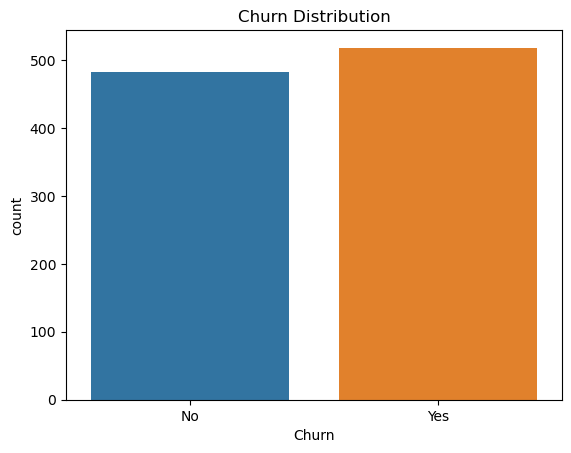

In [20]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Gender vs. Churn

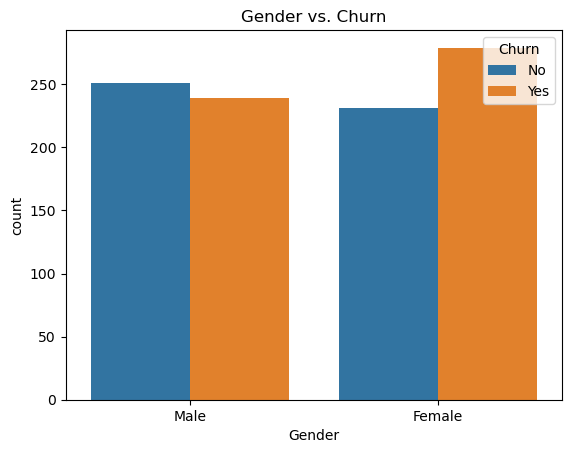

In [21]:
sns.countplot(x='Gender', hue='Churn', data=df)
plt.title('Gender vs. Churn')
plt.show()

# Contract type vs. Churn

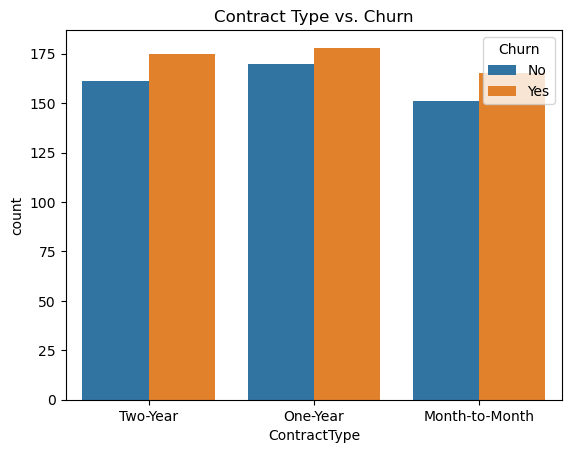

In [22]:
sns.countplot(x='ContractType', hue='Churn', data=df)
plt.title('Contract Type vs. Churn')
plt.show()


# Correlation matrix

C:\Users\Qurrat\AppData\Local\Temp\ipykernel_7968\3448318903.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


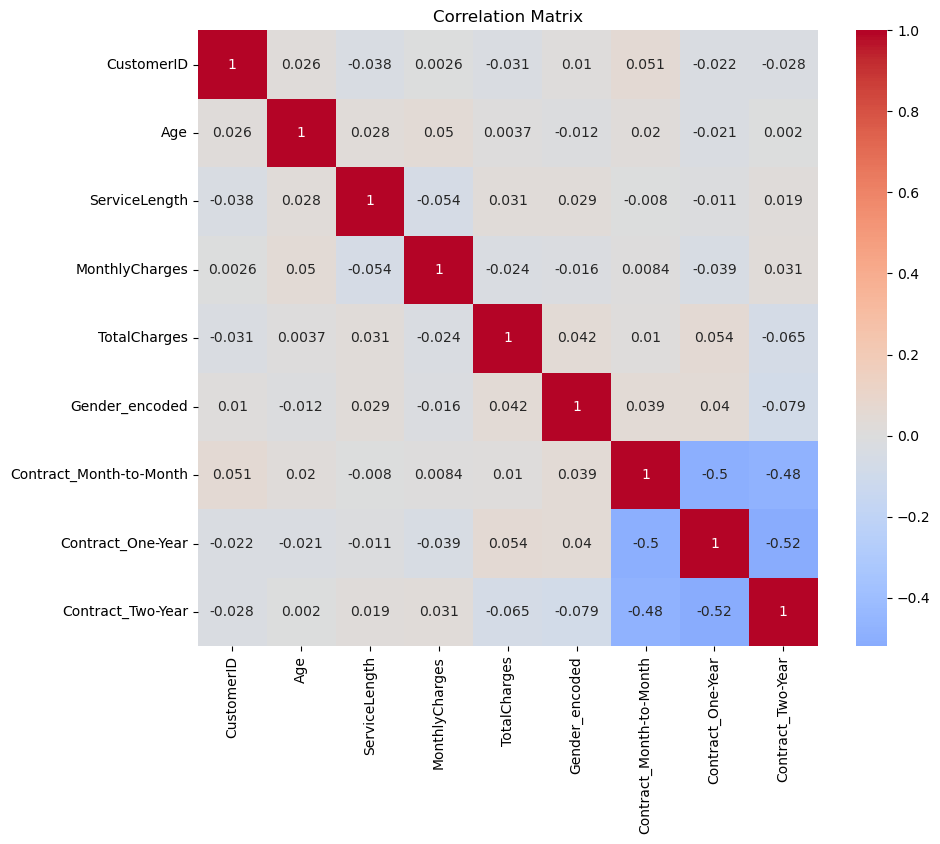

In [23]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Churn Prediction(Logistic Regression, Random Forest)

In [26]:
features = ['Gender_encoded', 'Age', 'ServiceLength', 'MonthlyCharges', 'TotalCharges',
            'Contract_One-Year', 'Contract_Two-Year', 'Contract_Month-to-Month']
target = 'Churn'

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)
logreg_pred = logreg_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# Model Evaluation
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))


print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))



Logistic Regression Results:
Accuracy: 0.545
              precision    recall  f1-score   support

          No       0.58      0.37      0.46       102
         Yes       0.53      0.72      0.61        98

    accuracy                           0.55       200
   macro avg       0.56      0.55      0.53       200
weighted avg       0.56      0.55      0.53       200


Random Forest Results:
Accuracy: 0.45
              precision    recall  f1-score   support

          No       0.46      0.40      0.43       102
         Yes       0.45      0.50      0.47        98

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.45      0.45       200

